Develop a model to analyze the nutrient composition of various foods and suggest healthier alternatives.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Read in the dataset
df = pd.read_csv('/content/food_calorie_conversion_factor.csv')

# Define the independent and dependent variables
X = df['carbohydrate_value'].values.reshape(-1,1)
y = df['protein_value'].values.reshape(-1,1)

In [2]:
df 

,food_nutrient_conversion_factor_id,protein_value,fat_value,carbohydrate_value
0,22503,3.47,8.37,4.07
1,22505,4.27,8.79,3.87
2,22507,2.44,8.37,3.57
3,22510,2.44,8.37,3.57
4,22512,2.44,8.37,3.57
...,...,...,...,...
230,22932,3.36,8.37,3.60
231,22933,3.36,8.37,3.60
232,22934,3.36,8.37,3.60
233,22935,3.36,8.37,3.60


In [3]:
#DATA CLEANING AND PREPROCESSING
 #1.Drop unnecessary columns:
df.drop(['fat_value'], axis=1, inplace=True)
 #2.Check for missing values:
df.isnull().sum()


food_nutrient_conversion_factor_id    0
protein_value                         0
carbohydrate_value                    0
dtype: int64

In [4]:
#3.Normalize the data:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

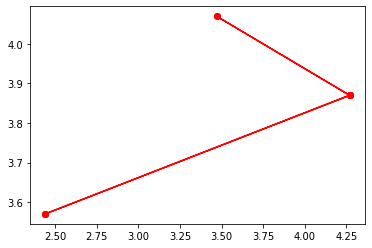

In [5]:
#Data Visualization
plt.plot(df['protein_value'].head(10), df['carbohydrate_value'].head(10), marker = 'o', color = 'red')

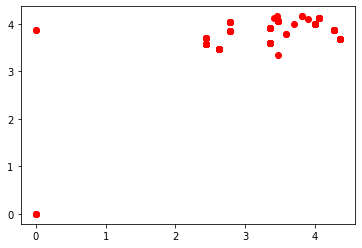

In [6]:
 #Draw the scatter plot 
x = df['protein_value']
y = df['carbohydrate_value']
plt.scatter(x, y, c = 'red')

In [7]:
#EXPLORATORY DATA ANALYSIS
#Central tendancy measure
print('Mean',df['protein_value'].mean())
print('Median',df['protein_value'].median())
print('Mode',df['protein_value'].mode())

Mean 3.4432340425531915
Median 3.46
Mode 0    4.27
dtype: float64


In [8]:
#Measure of dispersion
min=df['protein_value'].min()
max=df['protein_value'].max()
print(min,max)
print('Range',max-min)
print('var',df['protein_value'].var())
print('std',df['protein_value'].std())

0.0 4.36
Range 4.36
var 0.7136382142207672
std 0.8447711016723803


In [9]:
#IQR
Q1=df['protein_value'].quantile(.25)
Q3=df['protein_value'].quantile(.75)
print('IQR',Q3-Q1)

IQR 1.4899999999999998


In [10]:
#ZCORE 
import scipy.stats as stats
Zscore=stats.zscore(df['protein_value'])
print('Zscore',Zscore)

Zscore 0      0.031752
1      0.980775
2     -1.190116
3     -1.190116
4     -1.190116
         ...   
230   -0.098739
231   -0.098739
232   -0.098739
233   -0.098739
234   -0.098739
Name: protein_value, Length: 235, dtype: float64


Mean 3.4432340425531915
Median 3.46
Mode 0    4.27
dtype: float64


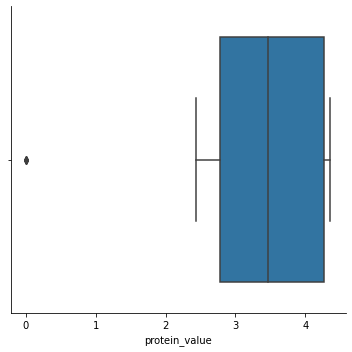

In [11]:
#BOXPLOT (OUTLIER DETECTION)
import seaborn as sns
sns.catplot(x='protein_value',kind='box',data=df)
print('Mean',df['protein_value'].mean())
print( 'Median' ,df['protein_value'].median())
print( 'Mode' ,df[ 'protein_value' ].mode())

IQR 1.4899999999999998


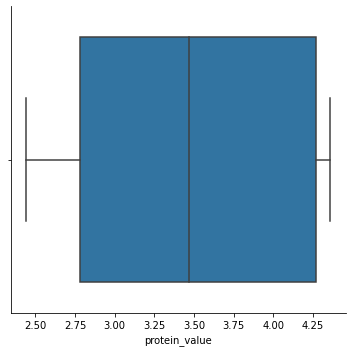

In [12]:
#REMOVING OUTLIER
Ql=df['protein_value'].quantile(.25)
Q3=df['protein_value'].quantile(.75)
IQR=Q3-Q1
print('IQR',Q3-Q1)
lb=Q1-1.5*IQR

ub=Q3+1.5*IQR

dfout=df[(df['protein_value']>lb) & (df['protein_value']<ub) ]
dfout.shape
dfout.tail()
sns.catplot(x='protein_value',kind='box',data=dfout)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])

Intercept: -8.881784197001252e-16
Slope: 1.0000000000000002


In [15]:
print(y_test,y_pred)

69     3.87
207    3.87
180    3.84
9      4.07
127    3.60
109    3.87
196    4.07
93     3.87
223    4.03
15     3.57
225    3.70
55     3.60
228    3.70
30     3.84
201    3.60
147    3.57
19     4.07
112    4.12
226    3.70
24     4.07
209    3.57
10     3.87
95     3.87
144    4.00
221    4.03
25     3.87
86     3.60
183    3.57
84     3.60
18     3.57
146    3.57
66     4.00
45     3.87
139    3.48
125    3.60
170    3.48
164    3.92
16     3.87
156    3.57
177    0.00
161    4.12
204    3.87
124    3.60
60     3.87
199    3.60
230    3.60
82     3.87
Name: carbohydrate_value, dtype: float64 [ 3.8700000e+00  3.8700000e+00  3.8400000e+00  4.0700000e+00
  3.6000000e+00  3.8700000e+00  4.0700000e+00  3.8700000e+00
  4.0300000e+00  3.5700000e+00  3.7000000e+00  3.6000000e+00
  3.7000000e+00  3.8400000e+00  3.6000000e+00  3.5700000e+00
  4.0700000e+00  4.1200000e+00  3.7000000e+00  4.0700000e+00
  3.5700000e+00  3.8700000e+00  3.8700000e+00  4.0000000e+00
  4.0300000e+00  3.8700000e+0

In [16]:
n = float(input("Enter the carbohydrate value:"))
n = np.array(n).reshape(-1,1)
print(model.predict(n)[0])

Enter the carbohydrate value:2.45
2.4499999999999997
